### Import necessary Libraries

In [4]:
# Import Libraries

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve, auc

warnings.filterwarnings('ignore')

### Import the Dataset

In [5]:
# Importing the Csv file

df = pd.read_csv("D:\\UNIFIED PROJECTS\\IBM\\HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis (EDA)

In [6]:
df.shape

(1470, 35)

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
df.duplicated().sum()

0

In [12]:
df['Attrition'].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

### VISUALIZATION

### Employee Attrition Percentage

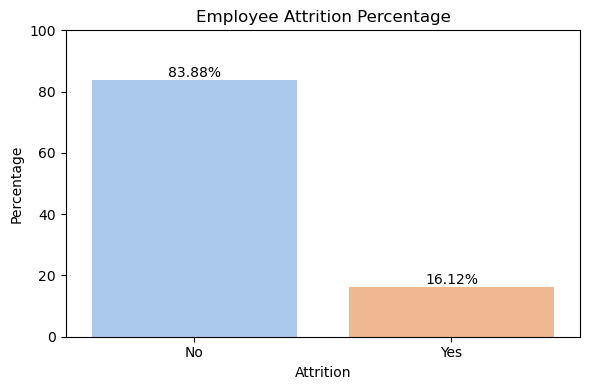

In [13]:
# Calculate normalized value counts (percentage)
attrition = df['Attrition'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=attrition.index, y=attrition.values, palette='pastel')

# Add percentage labels on top of bars
for i, value in enumerate(attrition.values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')

plt.title('Employee Attrition Percentage')
plt.xlabel('Attrition')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

- From the above bar graph we can conclude that company's attrition rate is 16.12%. Which means 16.12% of the employees are leaving the company.

### Function to plot Boxplot and Histogram for Numerical variables

In [14]:
# Function for plotting the distribution of numerical variables and its effect on attrition

def Numerical_Variables_Graphs(df,numerical_col,target_var = "Attrition"):
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = numerical_col, data=df, ax=ax[0], hue='Attrition')
    ax[0].set_title(f"Comparision of {numerical_col} vs {target_var}")
    
    #distribution plot
    ax[1].set_title(f"Distribution of {numerical_col}")
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[numerical_col], ax=ax[1], kde=False)
    plt.show()

### Age

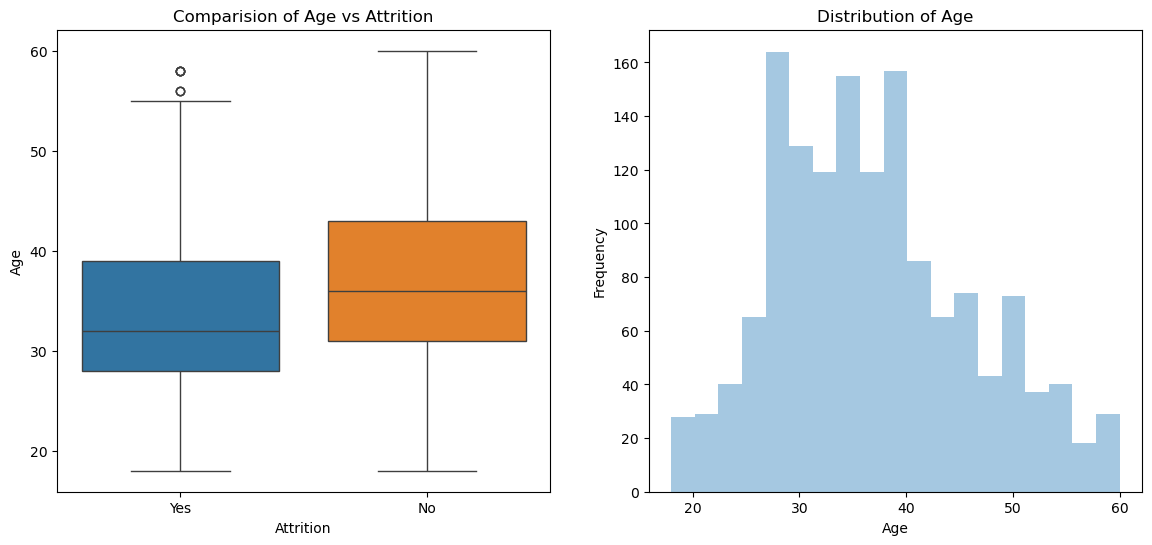

In [15]:
Numerical_Variables_Graphs(df,'Age')

- We found that the employees leaving the company are of age in between 27 to 40 years.
- Employees who stayed are of age around 32 to 42 years. 

### DailyRate

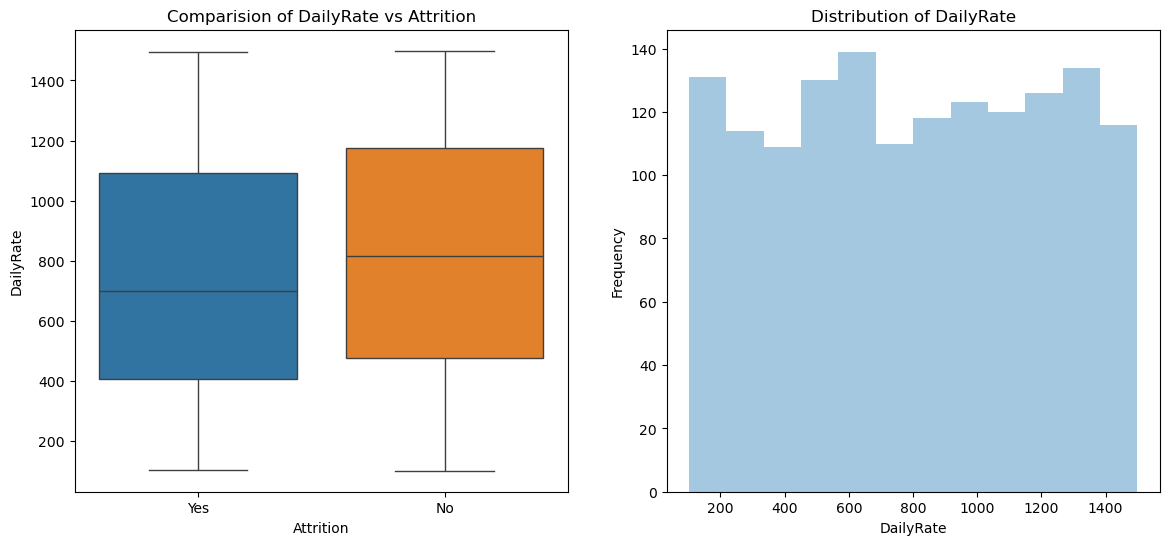

In [16]:
Numerical_Variables_Graphs(df,'DailyRate')

### MonthlyIncome

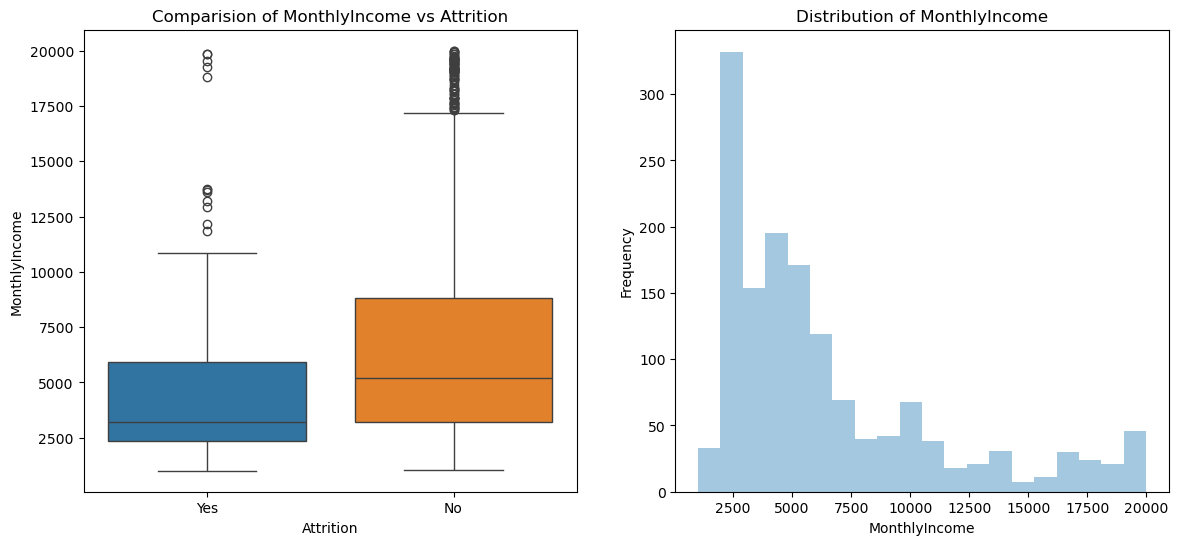

In [17]:
Numerical_Variables_Graphs(df,'MonthlyIncome')

- Employees having lower Monthly Income are more likely to leave the company.

### HourlyRate

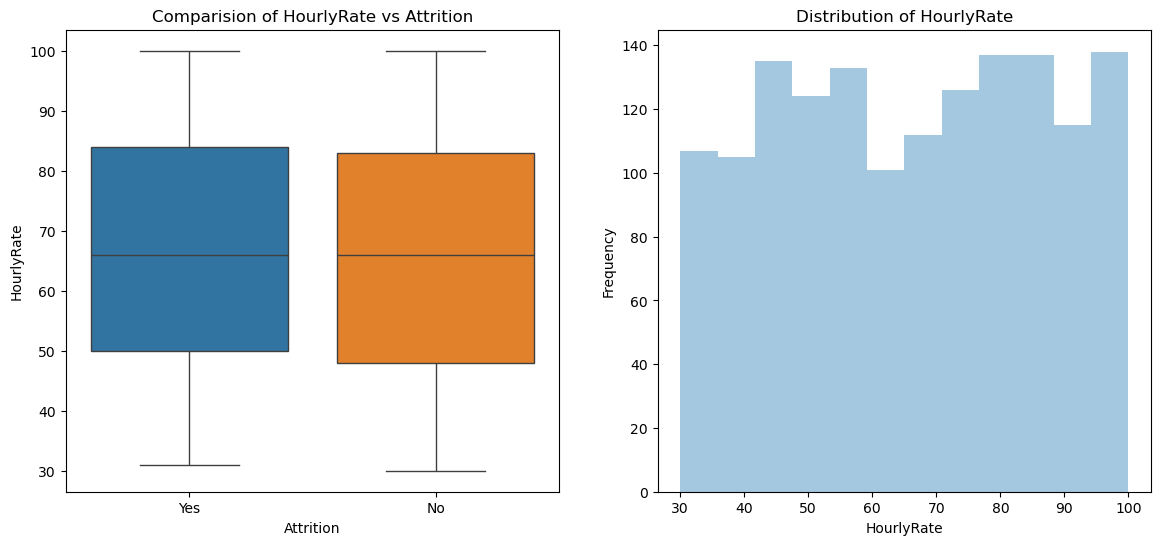

In [18]:
Numerical_Variables_Graphs(df,'HourlyRate')

- Hourly Rate is not a factor that influencing employee attrition.

### PercentSalaryHike

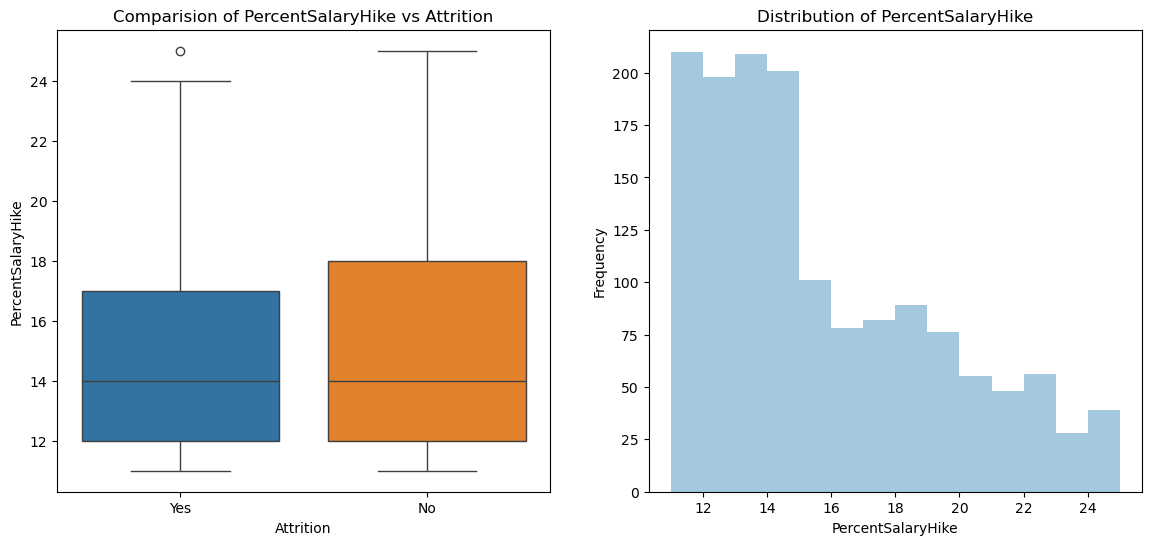

In [19]:
Numerical_Variables_Graphs(df,'PercentSalaryHike')

- We can see that employees with less salary hike left the company.

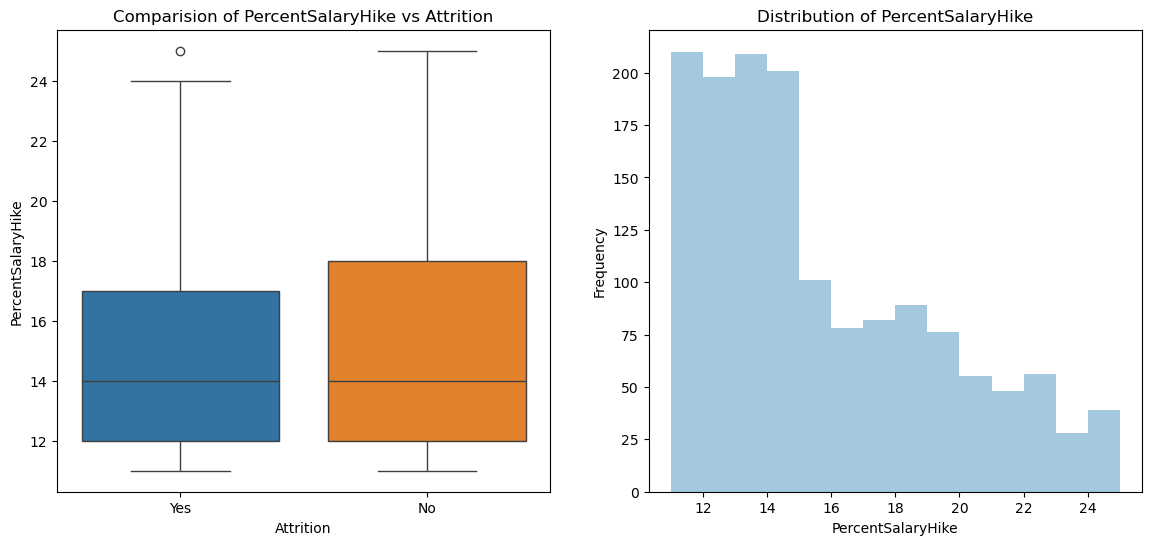

In [20]:
Numerical_Variables_Graphs(df,'PercentSalaryHike')

### TotalWorkingYears

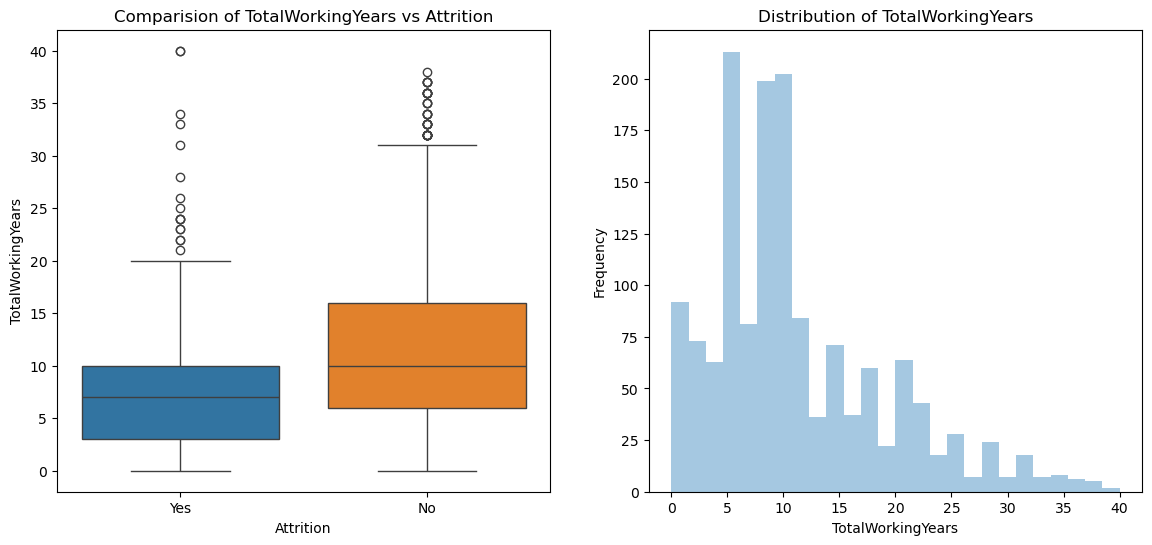

In [21]:
Numerical_Variables_Graphs(df,'TotalWorkingYears')

- Employees with less total working years are leaving the company.

### DistanceFromHome

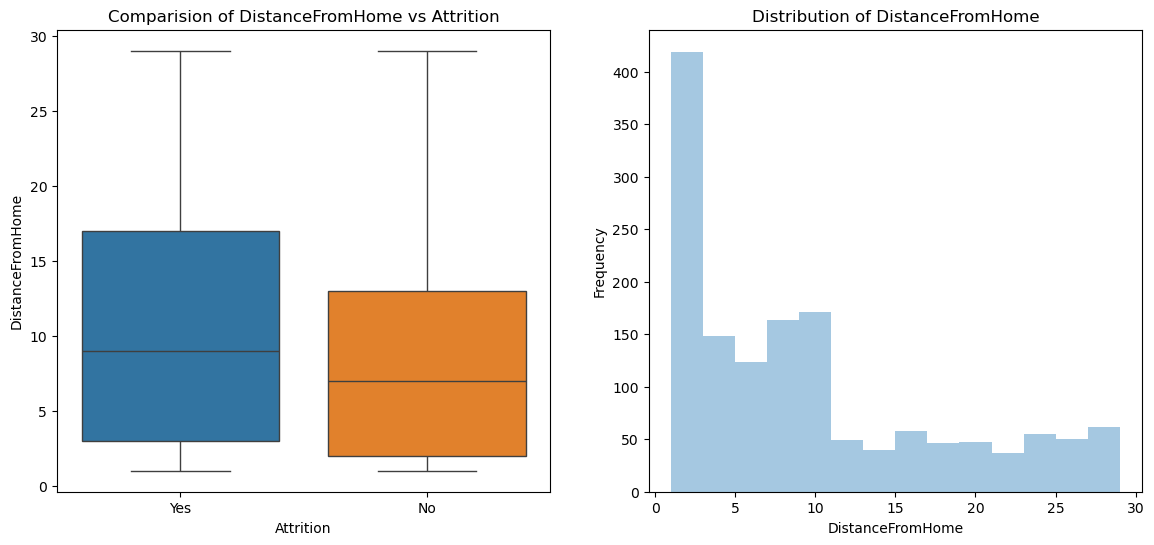

In [22]:
Numerical_Variables_Graphs(df,'DistanceFromHome')

- The employees who live far from work are more likely to leave.

### StockOptionLevel

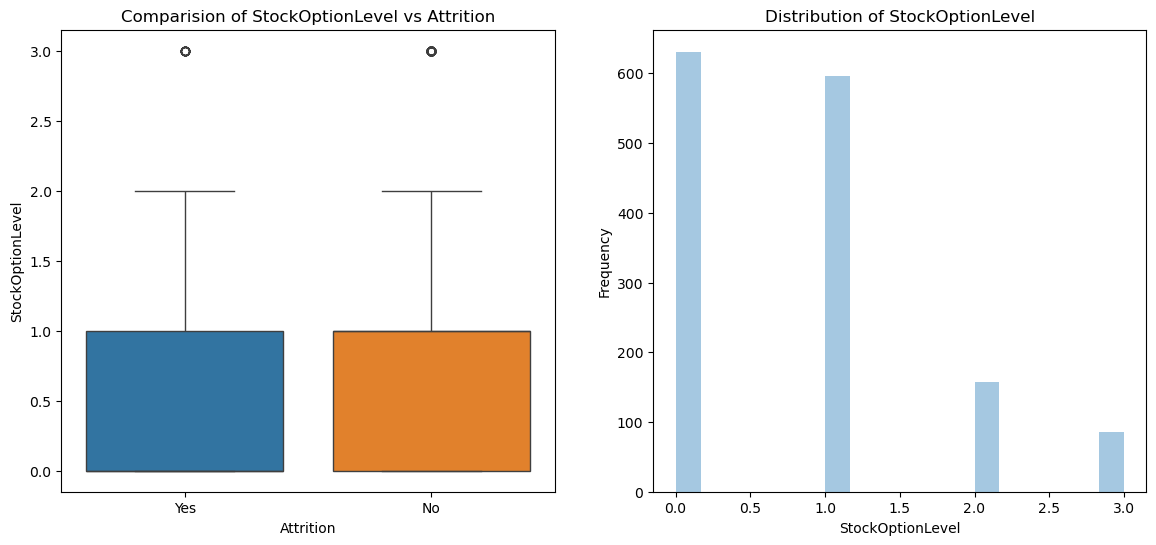

In [23]:
Numerical_Variables_Graphs(df,'StockOptionLevel')

- There is no significant difference in StockOptionLevel between employees who stayed and those who left.

### Function to plot Bar Graph for Categorical variables

In [43]:
# Plots a countplot for a categorical variable and its effect on Attrition by sorting asc to desc

def Categorical_Variables_Graphs(df, categorical_col, invert_axis=False, Attrition_Col="Attrition", sort_order='desc'):

    df = df.copy()
    
    # Convert target variable to numeric: Yes = 1, No = 0
    df['Attrition_Num'] = df[Attrition_Col].apply(lambda x: 1 if x == 'Yes' else 0)

    # Average attrition rate per category
    avg_df = df.groupby(categorical_col)['Attrition_Num'].mean().reset_index()
    
    # Sort by attrition rate
    ascending = True if sort_order == 'asc' else False
    avg_df = avg_df.sort_values(by='Attrition_Num', ascending=ascending)

    # Define category order
    ordered_categories = avg_df[categorical_col].tolist()

    # Apply category order to both dataframes
    df[categorical_col] = pd.Categorical(df[categorical_col], categories=ordered_categories, ordered=True)
    avg_df[categorical_col] = pd.Categorical(avg_df[categorical_col], categories=ordered_categories, ordered=True)

    # Palette for consistent coloring
    unique_categories = avg_df[categorical_col].nunique()
    palette = sns.color_palette("Set2", unique_categories)

    # Plotting
    fig, ax = plt.subplots(ncols=2, figsize=(14, 6))

    # Countplot
    if not invert_axis:
        sns.countplot(x=categorical_col, data=df, hue=Attrition_Col, ax=ax[0], order=ordered_categories)
    else:
        sns.countplot(y=categorical_col, data=df, hue=Attrition_Col, ax=ax[0], order=ordered_categories)
    ax[0].set_title(f"Comparison of {categorical_col} vs {Attrition_Col}")

    # Barplot (sorted by average attrition)
    if not invert_axis:
        sns.barplot(x=categorical_col, y='Attrition_Num', data=avg_df, ax=ax[1], palette=palette, order=ordered_categories)
    else:
        sns.barplot(y=categorical_col, x='Attrition_Num', data=avg_df, ax=ax[1], palette=palette, order=ordered_categories)
    ax[1].set_title(f"{Attrition_Col} Rate by {categorical_col}")
    ax[1].set_ylabel(f"Average {Attrition_Col}")

    plt.tight_layout()
    plt.show()

### Gender

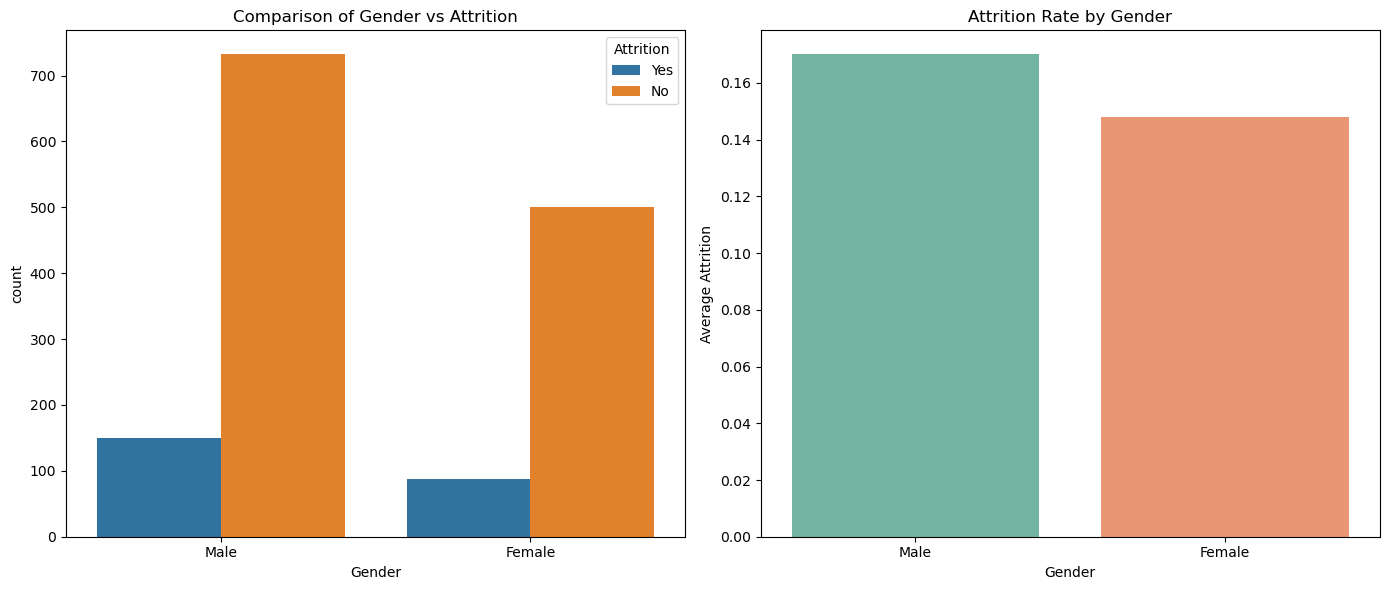

In [44]:
Categorical_Variables_Graphs(df,'Gender')

- Male has more population and also has high attrition.

### Education

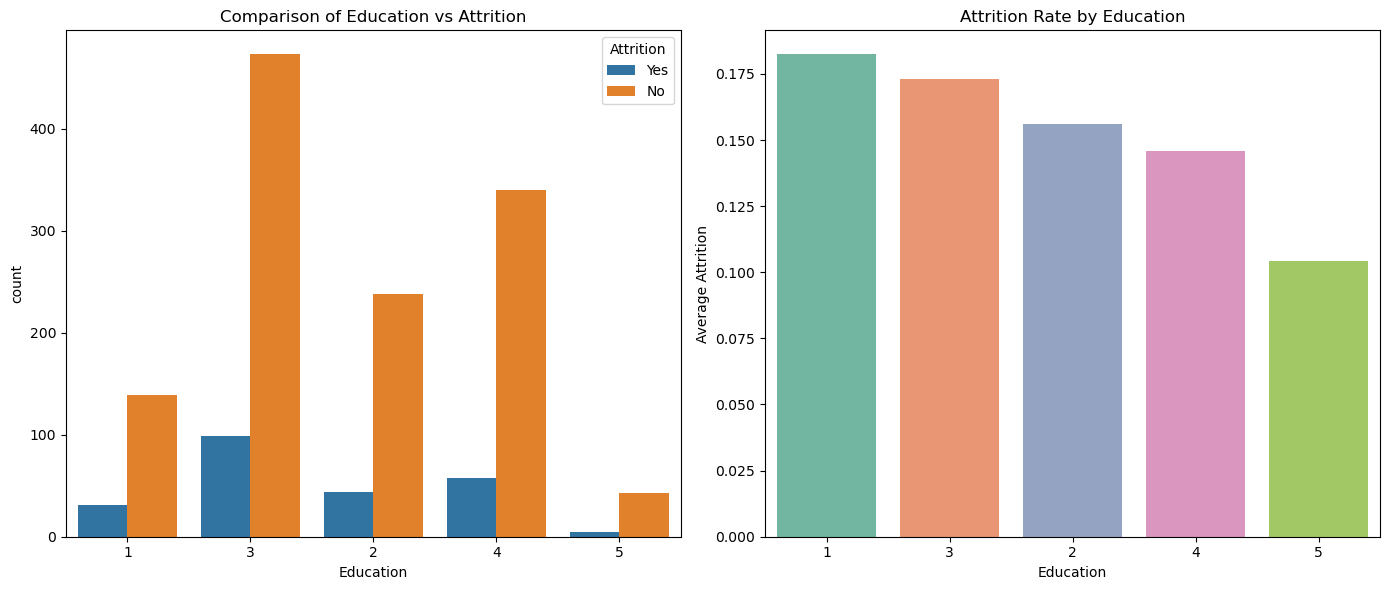

In [45]:
Categorical_Variables_Graphs(df,'Education')

- Employees with lower Education levels i.e Below college have a higher attrition.
- The graph shows that higher education levels are associated with lower attrition rate.

### Department

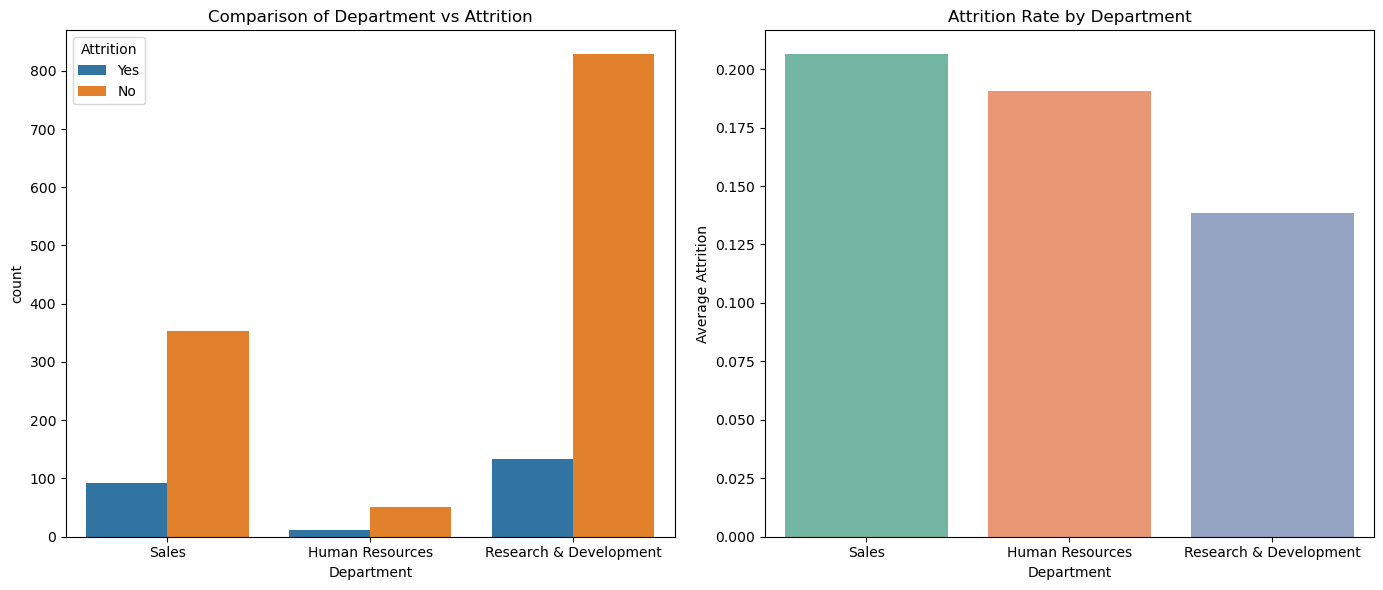

In [46]:
Categorical_Variables_Graphs(df,'Department')

- Research & Development has the highest count of employees with low attrition, while Human Resources shows very less attrition..
- The Sales department has the highest attrition rate followed by Human Resources and Research & Development showing the lowest attrition rate.

### JobRole

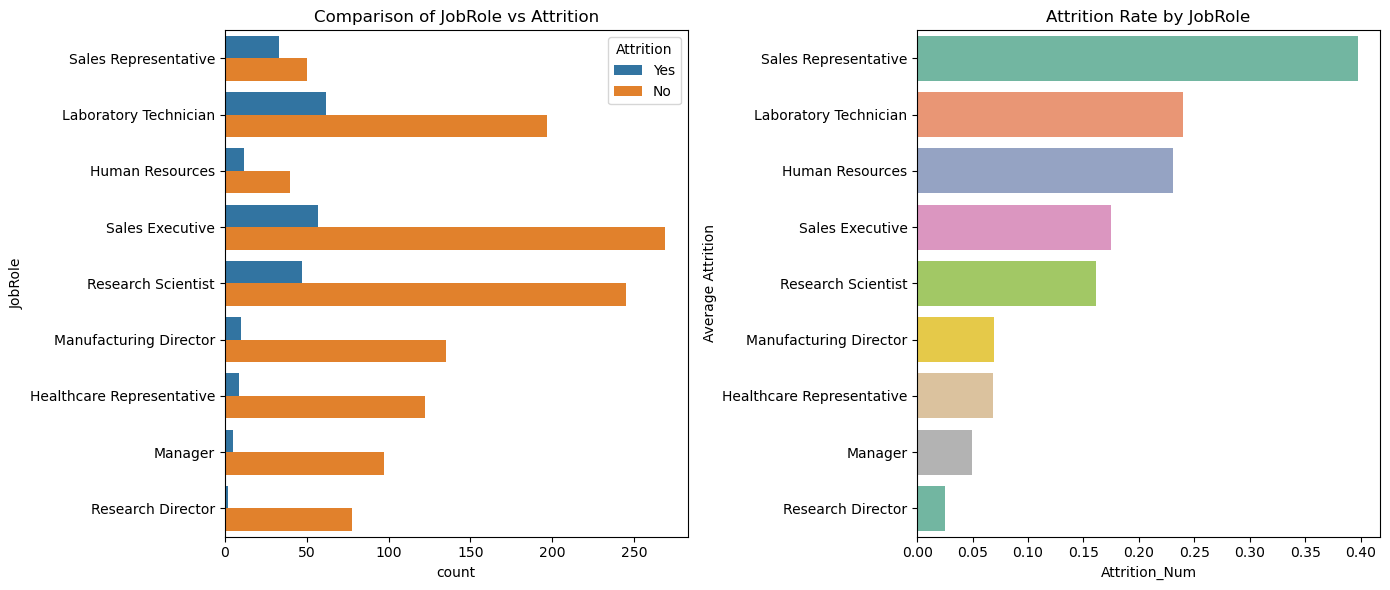

In [47]:
Categorical_Variables_Graphs(df,'JobRole', invert_axis=True)

- Sales Representative and Laboratory Technician have the highest attrition rates.
- Sales Executive and Research Scientist have the highest counts of employees with low attrition, while Research Director shows the lowest attrition.
- Job roles like Manufacturing Director and Healthcare Representative show balanced retention with lower attrition rates.

### JobSatisfaction

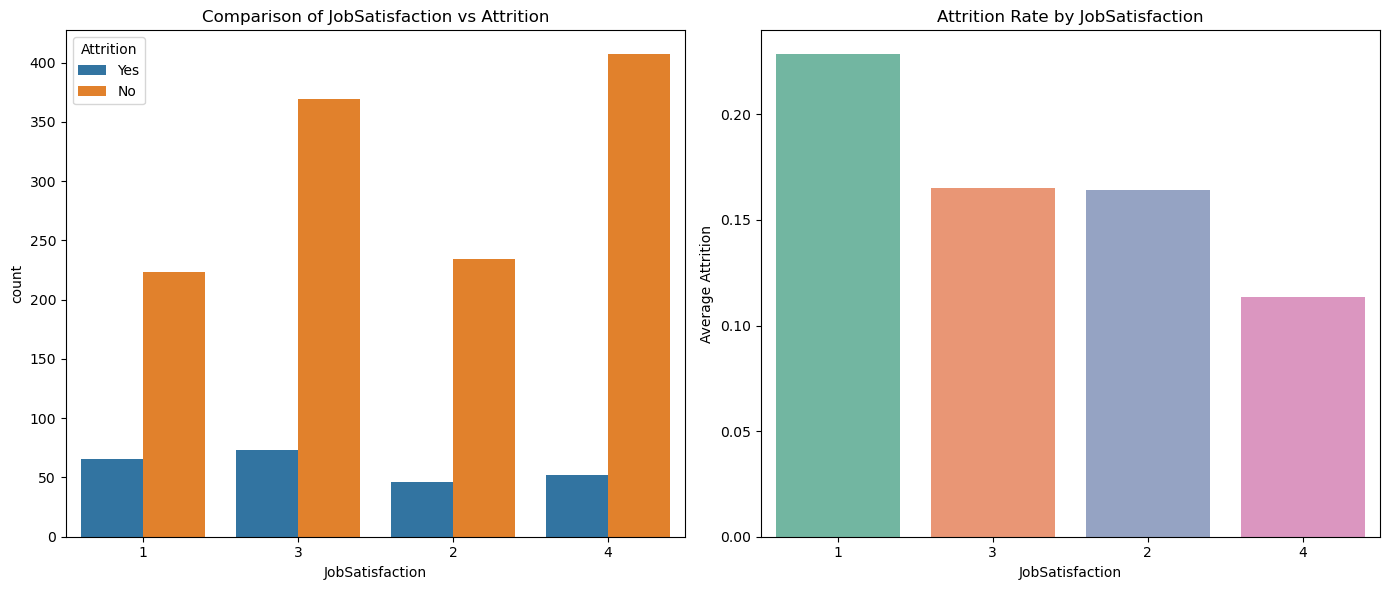

In [26]:
Categorical_Variables_Graphs(df,'JobSatisfaction')

- Employees with lowest Job Satisfaction have left the company.
- Employees with levels 2 & 3 are having similar attrition rates.
- Employees with highest satisfaction are having low attrition rate.

### WorkLifeBalance

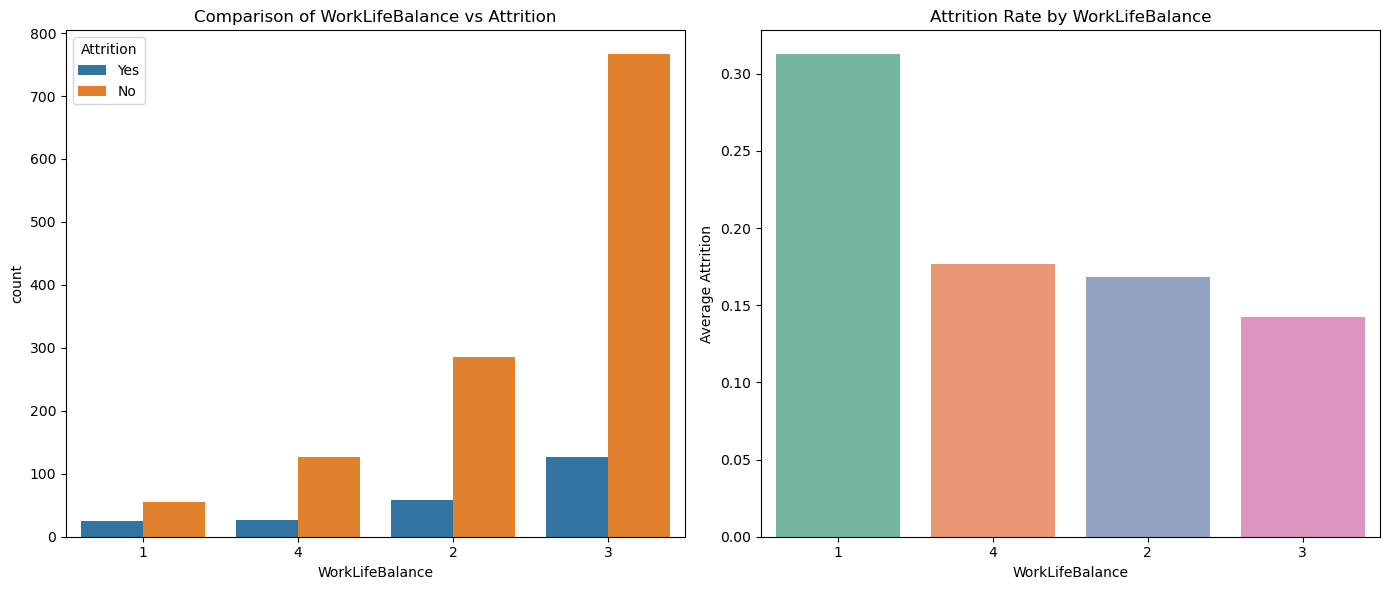

In [27]:
Categorical_Variables_Graphs(df,'WorkLifeBalance')

- Employees with the lowest Work-Life Balance have the highest attrition rate.
- Employees who gave highest Work-Life Balance level stayed with the company.

### PerformanceRating

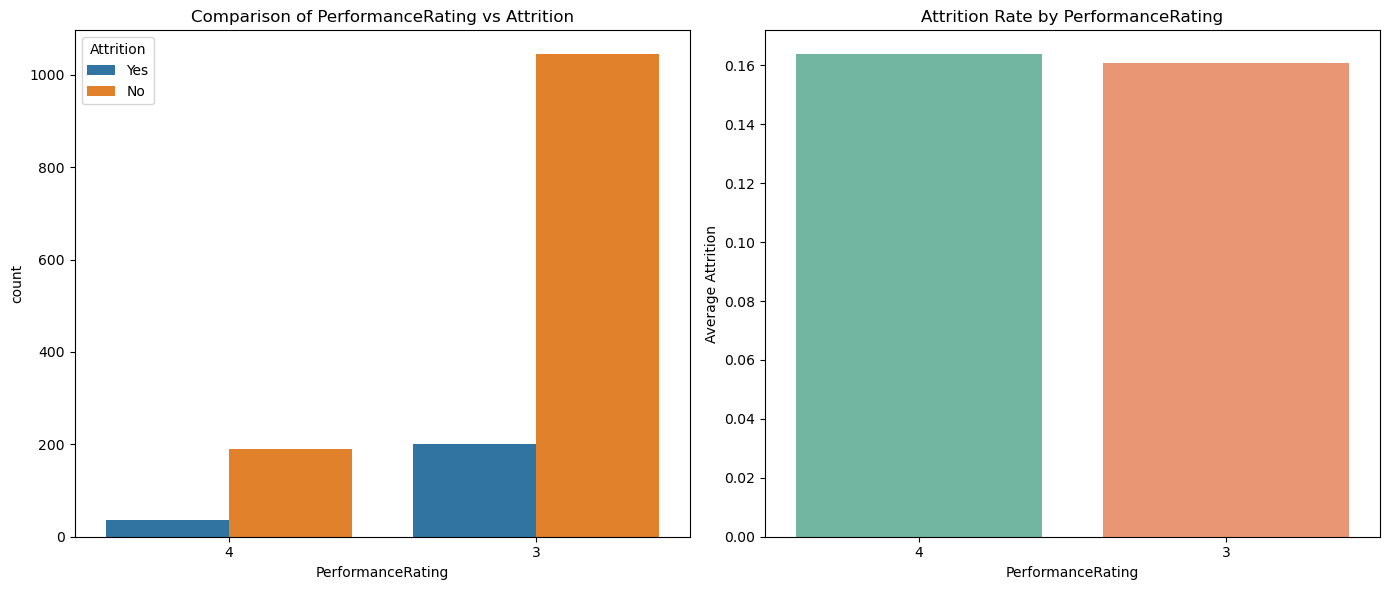

In [28]:
Categorical_Variables_Graphs(df,'PerformanceRating')

- Employees with performance rating 3 have a high attrition rate.

### RelationshipSatisfaction

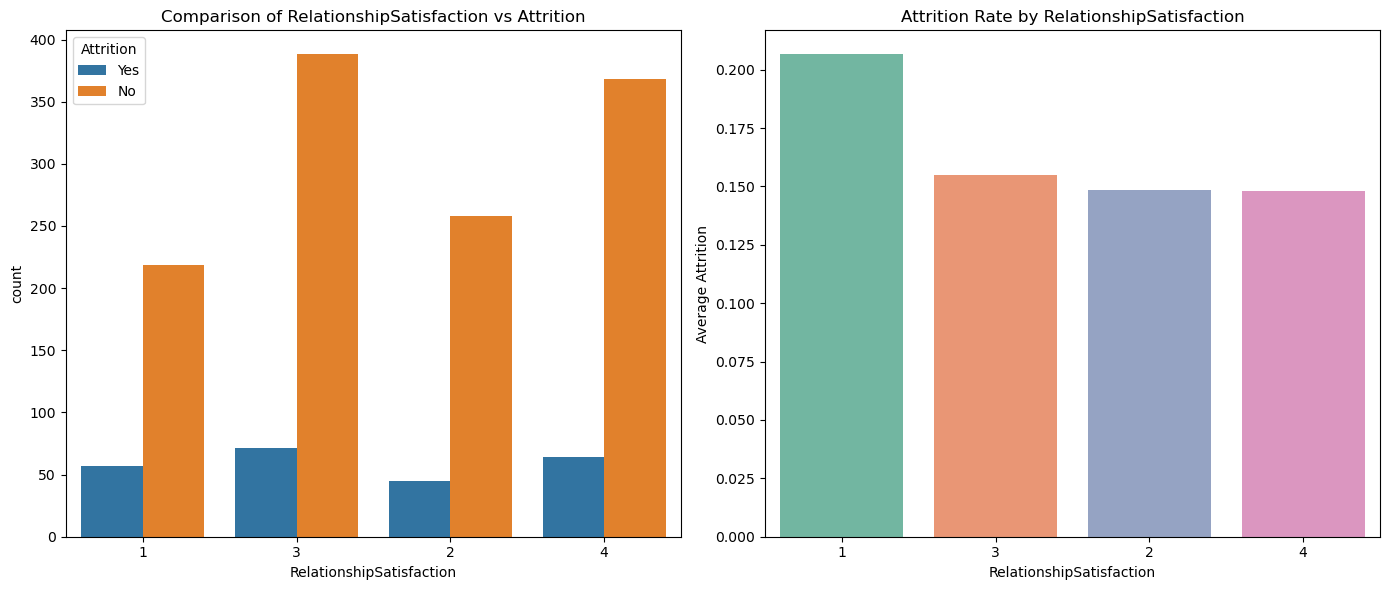

In [29]:
Categorical_Variables_Graphs(df,'RelationshipSatisfaction')

- Higher relationship satisfaction is associated with lower attrition.
- Employees who rated their relationship satisfaction as 1 had the highest chance of leaving.

### OverTime

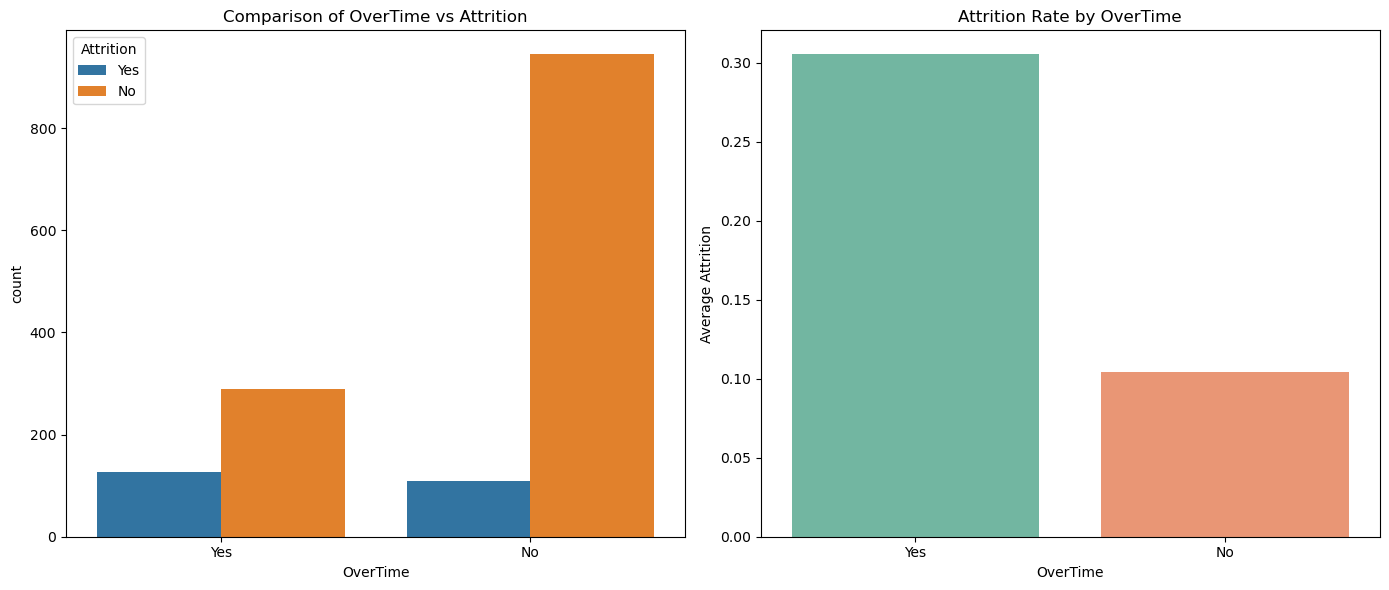

In [30]:
Categorical_Variables_Graphs(df,'OverTime')

- Working overtime is strongly correlated with higher attrition.
- The employees who usually work Overtime are more likey leaving the company.
- Employees who don't work overtime stayed with the company.

### BusinessTravel

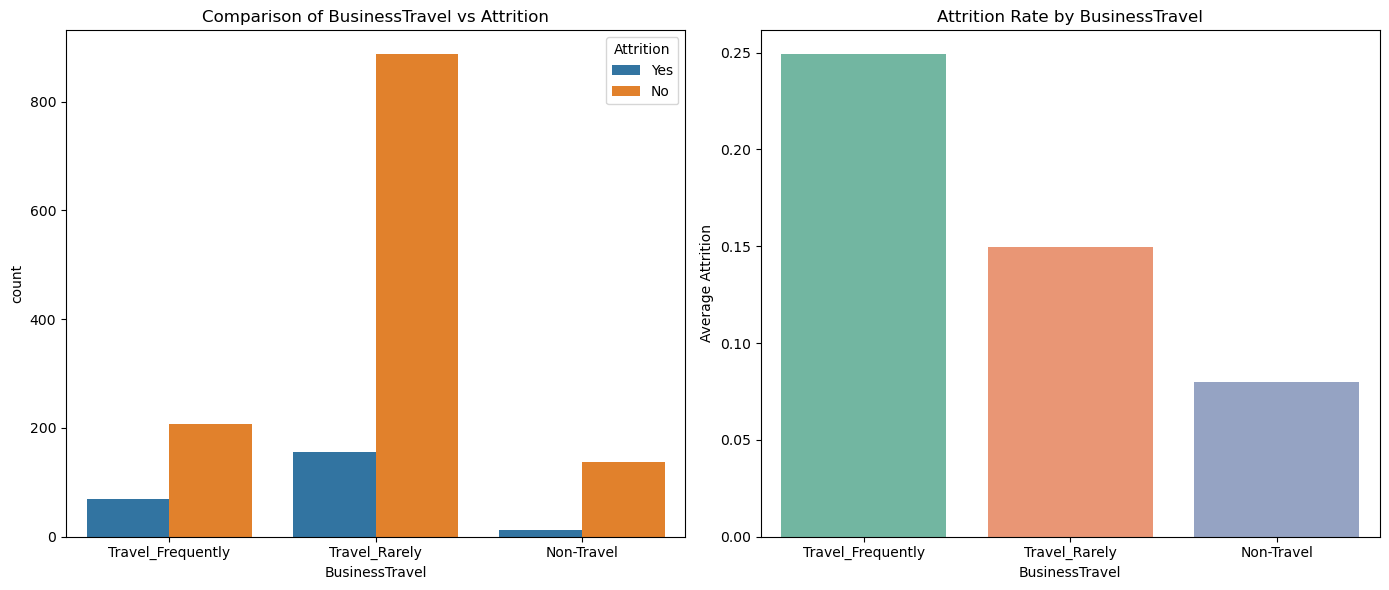

In [31]:
Categorical_Variables_Graphs(df,'BusinessTravel')

- Attrition counts are highest for those who Travel_Rarely, followed by Travel_Frequently, and lowest for Non-Travel.
- Employees who don’t travel are significantly less likely to leave the company.

### EnvironmentSatisfaction

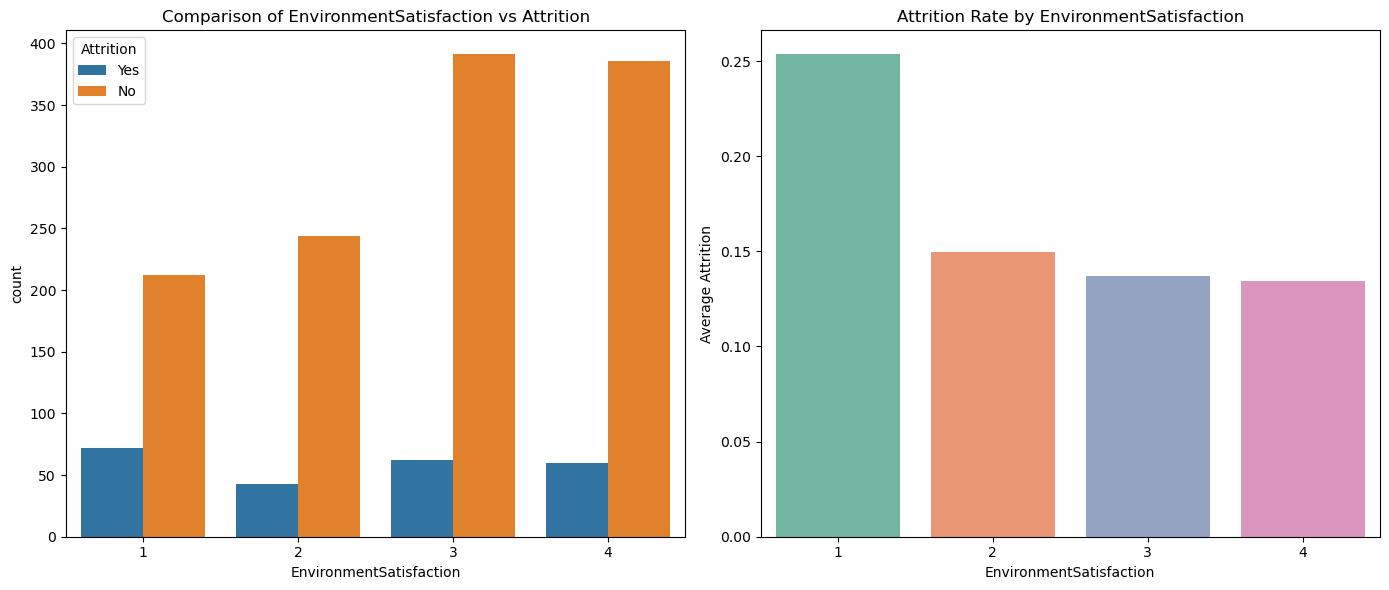

In [32]:
Categorical_Variables_Graphs(df,'EnvironmentSatisfaction')

- Employees with low Environment Satisfaction has left the company.
- Lower environment satisfaction is strongly associated with higher attrition.

### MaritalStatus

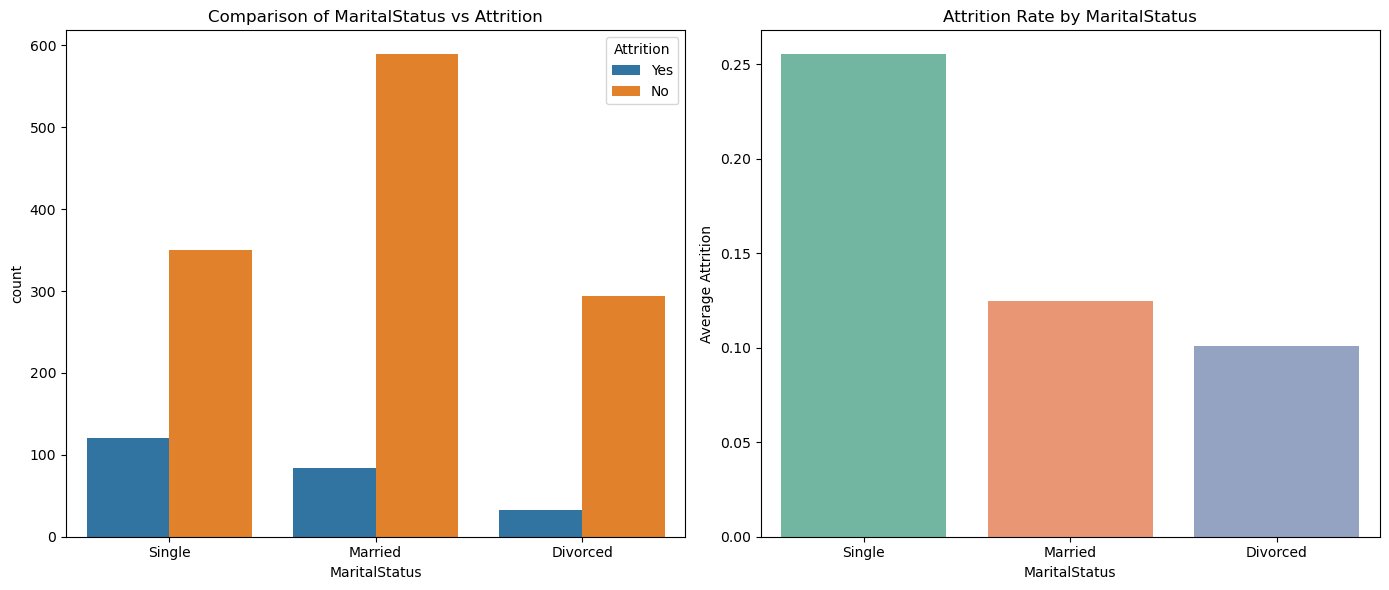

In [33]:
Categorical_Variables_Graphs(df,'MaritalStatus')

- Employees who are single having more attrition rate.

### DistanceFromHome Vs Gender & Attrition

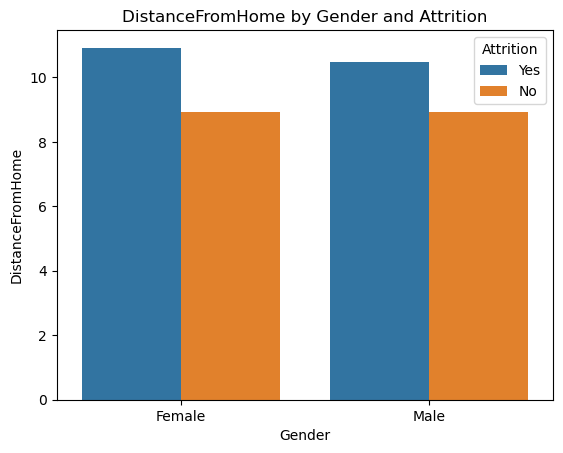

In [34]:
sns.barplot(data=df, x='Gender', y='DistanceFromHome', hue='Attrition', ci=None)
plt.title('DistanceFromHome by Gender and Attrition')
plt.show()

- Irrespective of Gender the Distance from Home highly influences the attrition rate.

### MonthlyIncome Vs Gender Box Plot

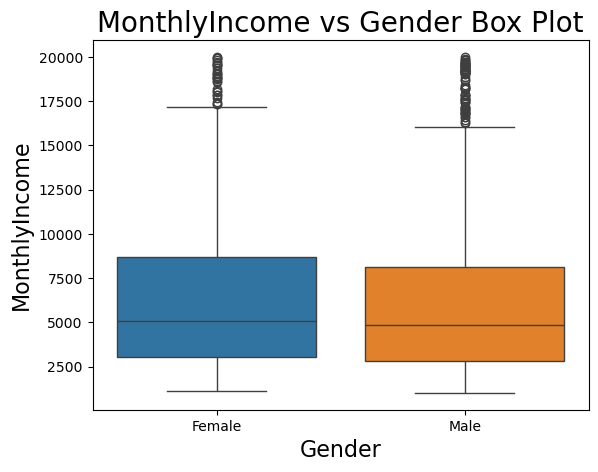

In [35]:
sns.boxplot(x='Gender', y='MonthlyIncome', data=df, hue='Gender')
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('MonthlyIncome', fontsize=16)
plt.show()

- Monthly Income is not influencing the attrition as both male and female have almost same income.

### MonthlyIncome by Education & Attrition

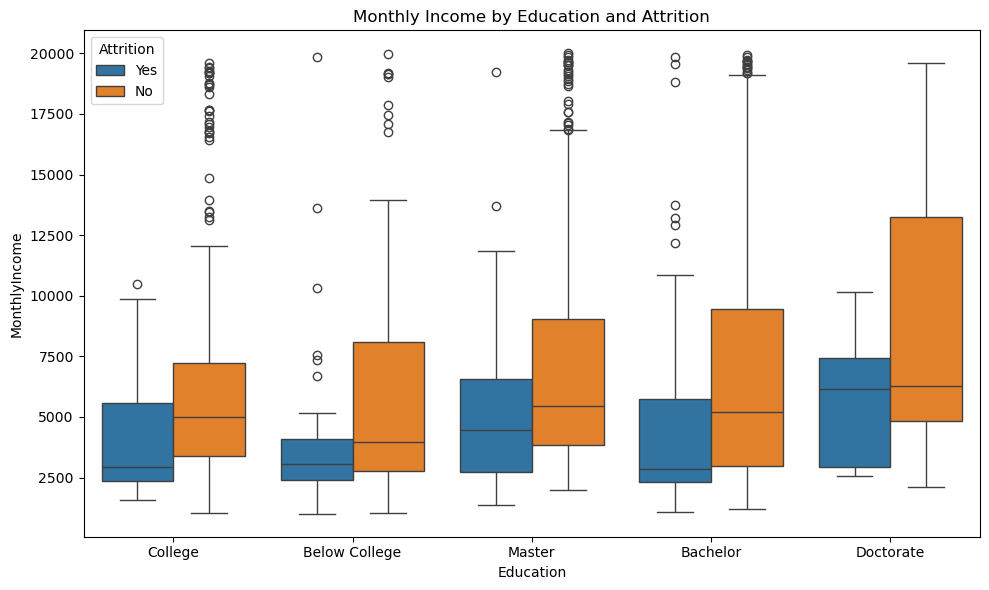

In [36]:
# Fix Education column
education_levels = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctorate'}

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Education'].map(education_levels), y='MonthlyIncome', hue='Attrition', data=df)
plt.title("Monthly Income by Education and Attrition")
plt.legend(title='Attrition', loc='upper left')
plt.tight_layout()
plt.show()

- Employees without attrition consistently earn more than those with attrition across all education levels, with the income gap widening at higher education levels.

### Attrition by Age Histogram

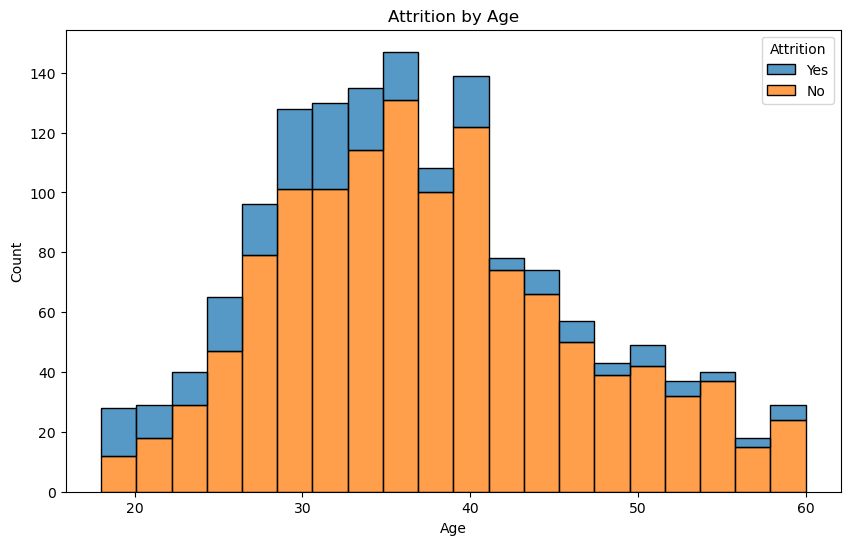

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', bins=20)
plt.title('Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- The largest number of employees, both with and without attrition, is concentrated between ages 30 and 40.
- Employees aged 50-60 show the lowest attrition rates, suggesting higher retention as age increases beyond 40.

### Histogram with Age Distribution for Employees who left the company

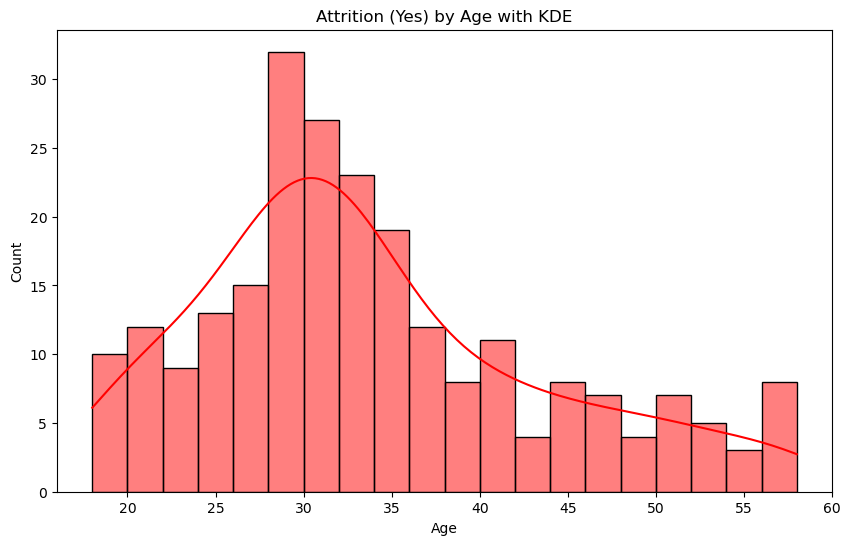

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Attrition'] == 'Yes'], x='Age', bins=20, kde=True, color='red')
plt.title('Attrition (Yes) by Age with KDE')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- The employees having age in between 27-35 are most prone to leaving.

### DistanceFromHome by Job Role and Attrition

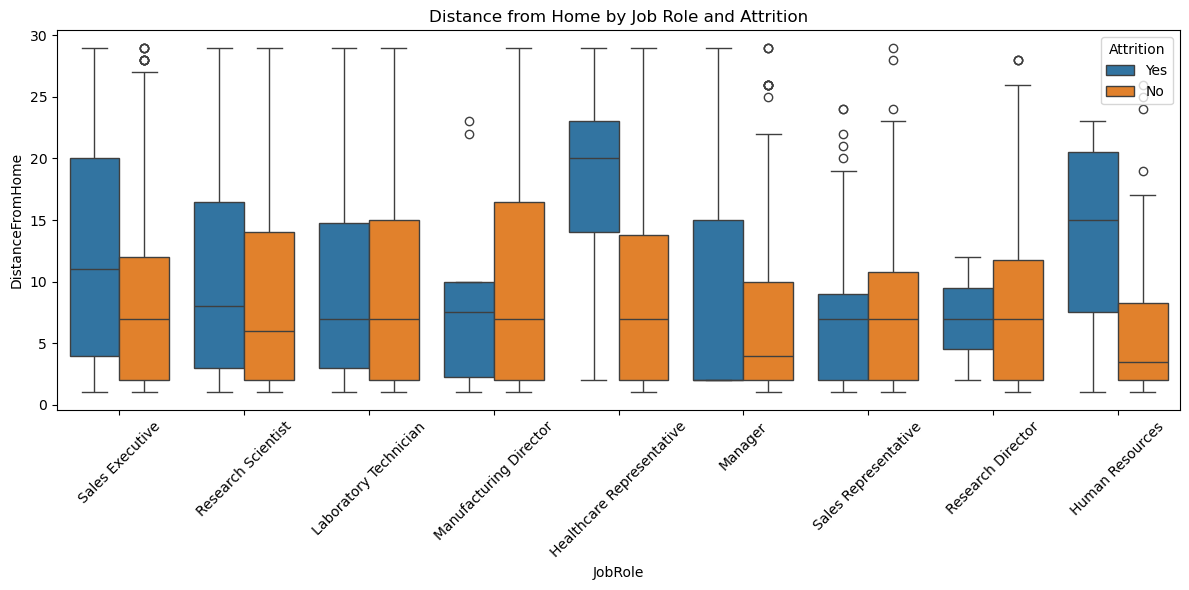

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobRole', y='DistanceFromHome', hue='Attrition', data=df)
plt.title("Distance from Home by Job Role and Attrition")
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

- Roles like Sales Executive, Laboratory Technician, Healthcare Representative and Human Resources have high attrition rate due to long distance from home.
- Distance from home is the main factor that influencing majority of the employee attrition.

### Attrition vs Job Satisfaction, Job Involvement and Work Life Balance

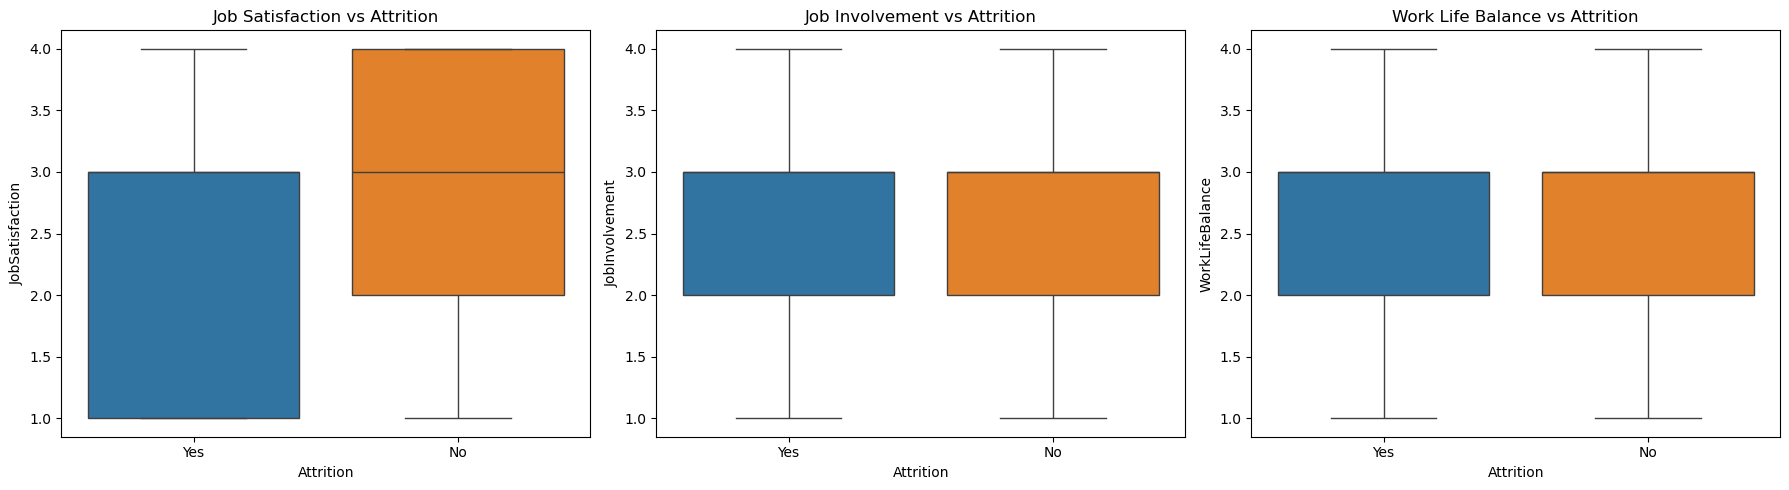

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, hue='Attrition', ax=axes[0])
axes[0].set_title("Job Satisfaction vs Attrition")

sns.boxplot(x='Attrition', y='JobInvolvement', data=df, hue='Attrition', ax=axes[1])
axes[1].set_title("Job Involvement vs Attrition")

sns.boxplot(x='Attrition', y='WorkLifeBalance', hue='Attrition', data=df, ax=axes[2])
axes[2].set_title("Work Life Balance vs Attrition")

plt.tight_layout()
plt.show()

### Monthly Income, Salary Hike vs Attrition

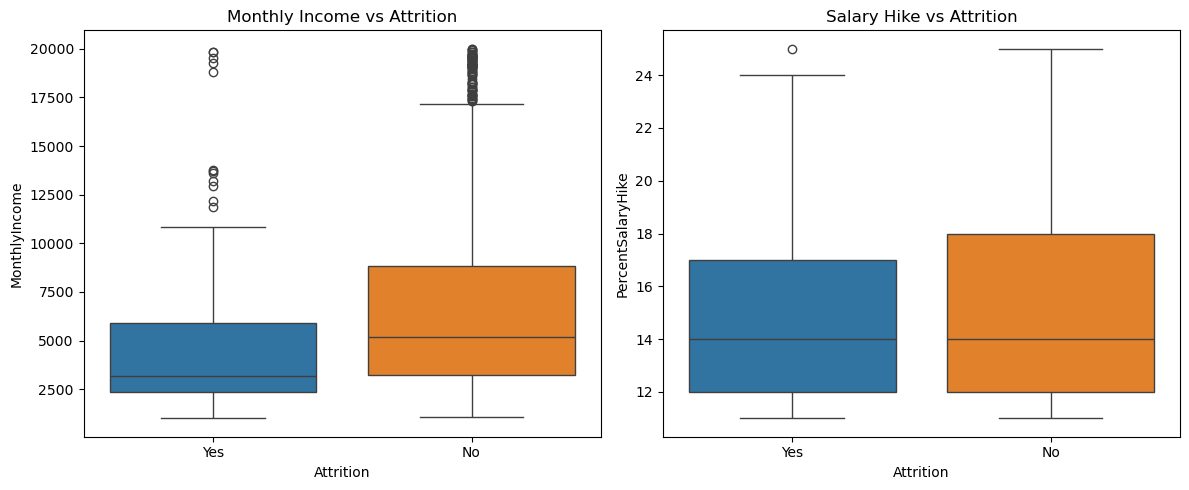

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='Attrition', y='MonthlyIncome', hue='Attrition', data=df, ax=axes[0])
axes[0].set_title("Monthly Income vs Attrition")

sns.boxplot(x='Attrition', y='PercentSalaryHike', hue='Attrition', data=df, ax=axes[1])
axes[1].set_title("Salary Hike vs Attrition")

plt.tight_layout()
plt.show()

- Employees with attrition have a lower monthly income compared to those without attrition.

### Avg Tenure

In [42]:
avg_tenure = df['YearsAtCompany'].mean()

print(f'Average years of employee to leave the company is {avg_tenure} years')

Average years of employee to leave the company is 7.0081632653061225 years


- The average tenure of employees before they decided to leave was 7.01 years. With this average tenure, it can be concluded that many employees feel comfortable and have been with the company for a long time.

### FEATURE ENGINEERING

In [43]:
list(df)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [44]:
df['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [45]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [46]:
df['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [47]:
df["EmployeeNumber"].value_counts()

EmployeeNumber
1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: count, Length: 1470, dtype: int64

In [48]:
df["StockOptionLevel"]

0       0
1       1
2       0
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    0
1469    0
Name: StockOptionLevel, Length: 1470, dtype: int64

### Drop Unnecessary Columns

In [49]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [50]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


### Label Encoding Categorical columns

In [53]:
label = LabelEncoder()
df['Attrition'] = label.fit_transform(df['Attrition'])

for col in df.select_dtypes(include='object').columns:
    df[col] = label.fit_transform(df[col])


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

### Heatmap to check Correlation

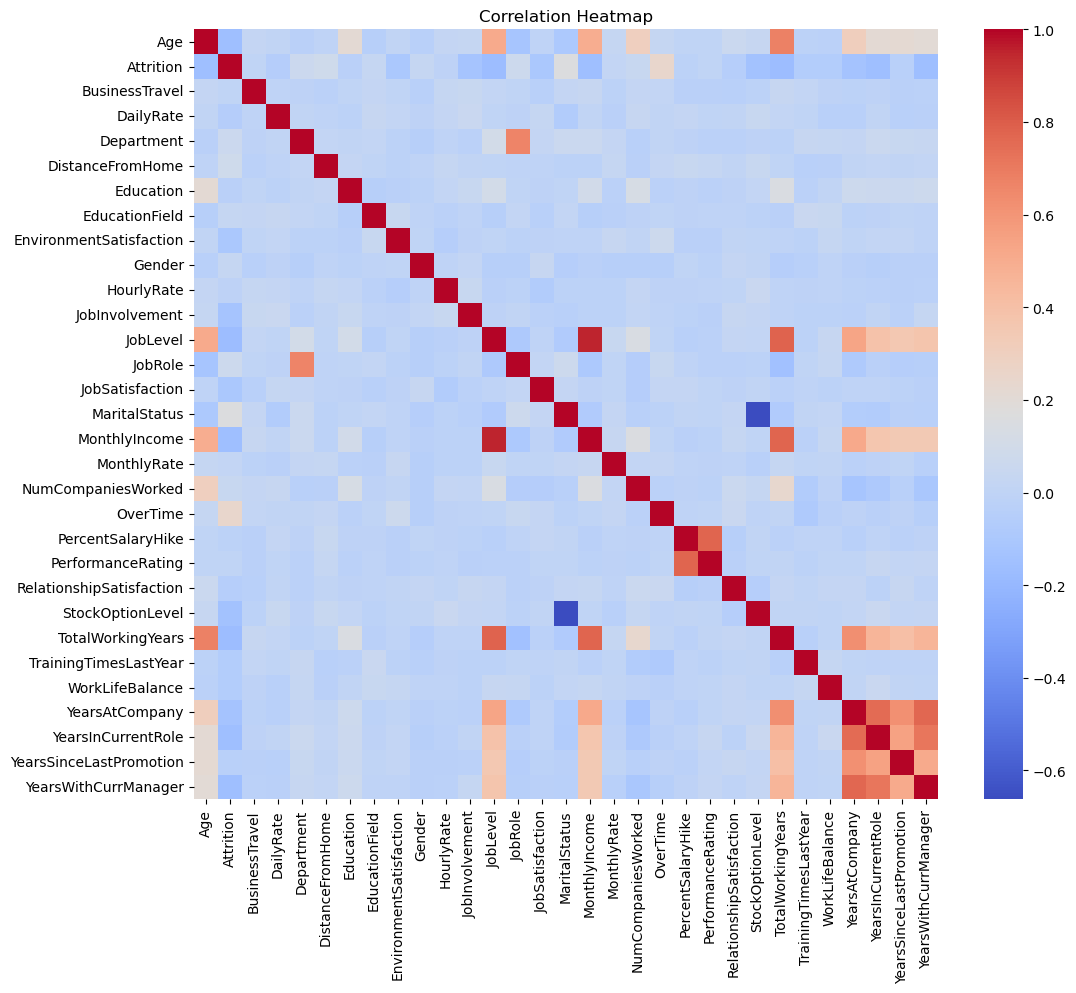

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Feature Selection

In [54]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

selector = SelectKBest(score_func=f_classif, k=10)
fit = selector.fit(x, y)

# Create a DataFrame of feature scores
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': fit.scores_})
feature_scores.sort_values(by='Score', ascending=False, inplace=True)
print(feature_scores)


                     Feature      Score
18                  OverTime  94.656457
23         TotalWorkingYears  44.252491
11                  JobLevel  43.215344
14             MaritalStatus  39.599763
27        YearsInCurrentRole  38.838303
15             MonthlyIncome  38.488819
0                        Age  38.175887
29      YearsWithCurrManager  36.712311
22          StockOptionLevel  28.140501
26            YearsAtCompany  27.001624
10            JobInvolvement  25.241985
13           JobSatisfaction  15.890004
7    EnvironmentSatisfaction  15.855209
4           DistanceFromHome   8.968277
12                   JobRole   6.649672
3                 Department   6.035877
25           WorkLifeBalance   6.026116
24     TrainingTimesLastYear   5.211646
2                  DailyRate   4.726640
21  RelationshipSatisfaction   3.095576
17        NumCompaniesWorked   2.782287
28   YearsSinceLastPromotion   1.602218
5                  Education   1.446308
8                     Gender   1.274587


### Feature selection using RFE

In [55]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(x, y)

selected_features = x.columns[fit.support_]
print("Selected Features:", selected_features.tolist())

Selected Features: ['Department', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'StockOptionLevel', 'WorkLifeBalance']


In [56]:
x = df.drop('Attrition', axis=1)
y = df["Attrition"]

In [57]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


### Feature selection using Random Forest Classifier

In [58]:

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

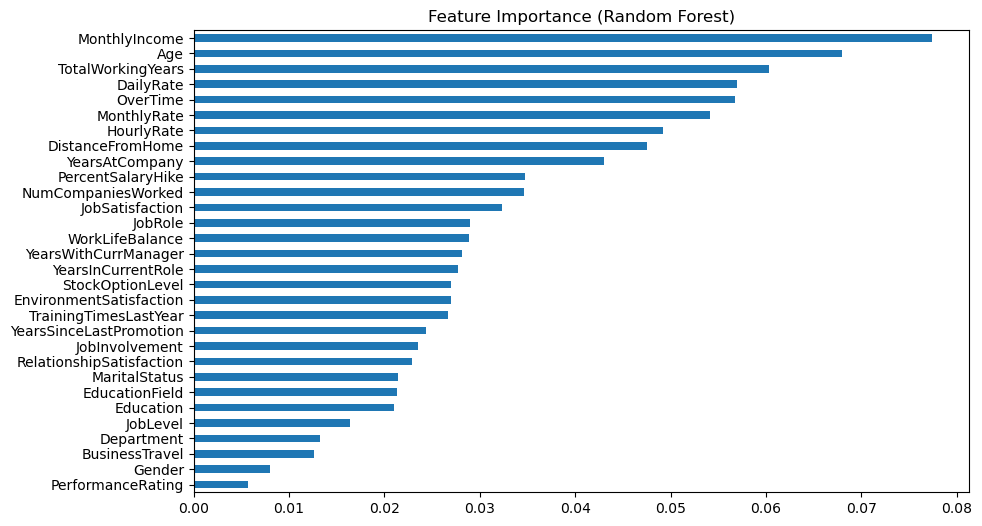

In [59]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [60]:
importances.sort_values(ascending=False)

MonthlyIncome               0.077363
Age                         0.068009
TotalWorkingYears           0.060343
DailyRate                   0.056956
OverTime                    0.056759
MonthlyRate                 0.054172
HourlyRate                  0.049228
DistanceFromHome            0.047542
YearsAtCompany              0.043054
PercentSalaryHike           0.034773
NumCompaniesWorked          0.034581
JobSatisfaction             0.032276
JobRole                     0.029000
WorkLifeBalance             0.028870
YearsWithCurrManager        0.028083
YearsInCurrentRole          0.027724
StockOptionLevel            0.027000
EnvironmentSatisfaction     0.026979
TrainingTimesLastYear       0.026628
YearsSinceLastPromotion     0.024343
JobInvolvement              0.023569
RelationshipSatisfaction    0.022922
MaritalStatus               0.021391
EducationField              0.021362
Education                   0.021010
JobLevel                    0.016427
Department                  0.013297
B

### Final selected features

In [61]:
final_features = [
    'OverTime', 'JobLevel', 'MaritalStatus', 'EnvironmentSatisfaction','JobInvolvement',
    'JobSatisfaction', 'StockOptionLevel', 'WorkLifeBalance','Department', 'Gender','TotalWorkingYears',
    'MonthlyIncome', 'Age','YearsInCurrentRole', 'YearsWithCurrManager', 'YearsAtCompany']

In [62]:
X = df[final_features]
Y = df['Attrition']

In [63]:
list(X)

['OverTime',
 'JobLevel',
 'MaritalStatus',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance',
 'Department',
 'Gender',
 'TotalWorkingYears',
 'MonthlyIncome',
 'Age',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'YearsAtCompany']

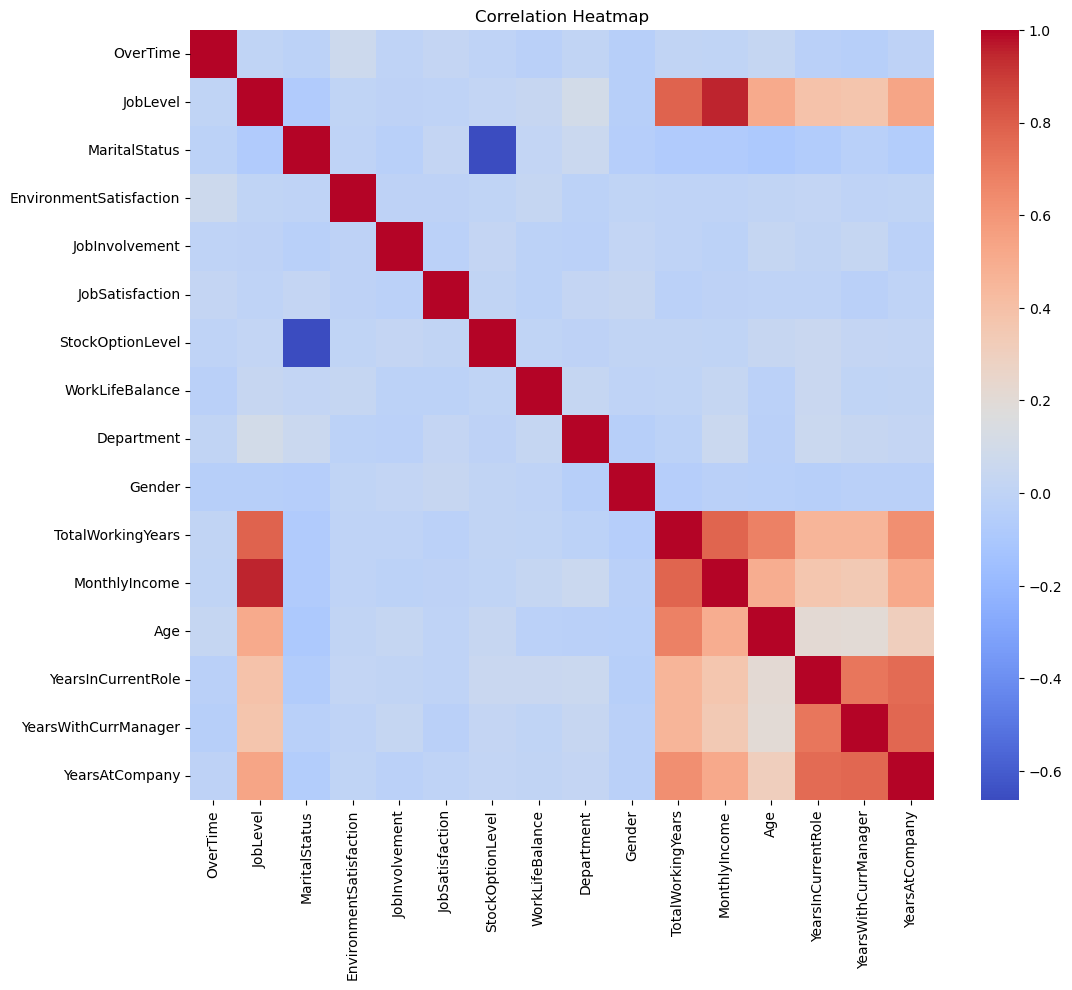

In [64]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [65]:
X.shape

(1470, 16)

In [66]:
Y.shape

(1470,)

### Logistic Regression

In [67]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[246   1]
 [ 43   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       0.80      0.09      0.15        47

    accuracy                           0.85       294
   macro avg       0.83      0.54      0.54       294
weighted avg       0.84      0.85      0.80       294


ROC AUC Score: 0.7588939615815317


### Logistic Regression with class Balanced

In [68]:
# Train-test split (no need to apply SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[183  64]
 [ 12  35]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       247
           1       0.35      0.74      0.48        47

    accuracy                           0.74       294
   macro avg       0.65      0.74      0.65       294
weighted avg       0.84      0.74      0.77       294



### Adjusting the Threshold value

In [69]:
# Predictions (probabilities instead of hard labels)
y_prob = model.predict_proba(X_test)[:, 1] 

# Choose a new threshold
threshold = 0.6
y_pred_threshold = (y_prob >= threshold).astype(int)

# Evaluation
print(f"Confusion Matrix with threshold {threshold}: \n", confusion_matrix(y_test, y_pred_threshold))
print(f"\nClassification Report with threshold {threshold}:\n", classification_report(y_test, y_pred_threshold))

# ROC AUC score for comparison
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob)}")

Confusion Matrix with threshold 0.6: 
 [[209  38]
 [ 19  28]]

Classification Report with threshold 0.6:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       247
           1       0.42      0.60      0.50        47

    accuracy                           0.81       294
   macro avg       0.67      0.72      0.69       294
weighted avg       0.84      0.81      0.82       294

ROC AUC Score: 0.8213455077956757


### Precision-Recall Curve

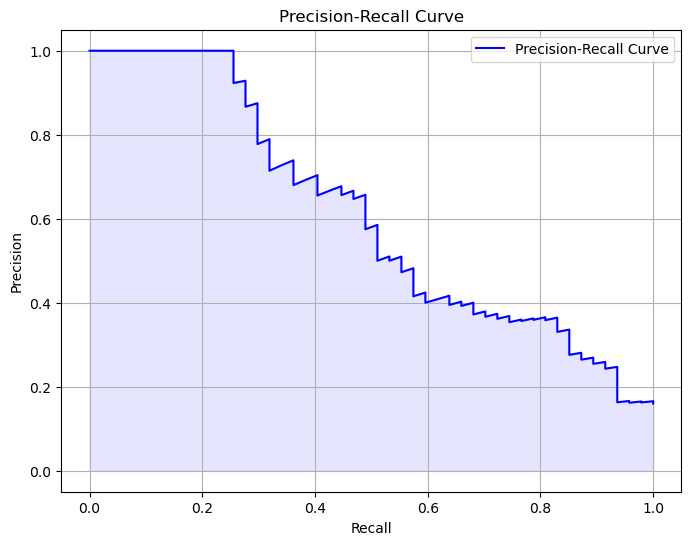

Best Threshold: 0.8775063844018851


In [70]:
# Get probabilities for class 1 (Attrition)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.fill_between(recall, precision, color='blue', alpha=0.1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Print the best threshold (where recall is high, but precision is still acceptable)
best_threshold_index = np.argmax(precision + recall)
best_threshold = thresholds[best_threshold_index]
print(f"Best Threshold: {best_threshold}")


### Accuracy = 81%

- As the data is not balanced so we are getting accuracy as 81%.

### Resampling Data

In [71]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution before SMOTE
print("Before SMOTE:", Counter(Y))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
X_smote, y_smote = smote.fit_resample(X, Y)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_smote))

# Train/Test Split on SMOTE data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)


Before SMOTE: Counter({0: 1233, 1: 237})
After SMOTE: Counter({1: 1233, 0: 1233})


### Random Forest Classifier

In [72]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[215  32]
 [ 29 218]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       247
           1       0.87      0.88      0.88       247

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494

ROC AUC Score: 0.9494664721598451


### XGB-Classifier

In [73]:
# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))


Confusion Matrix:
 [[219  28]
 [ 19 228]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       247
           1       0.89      0.92      0.91       247

    accuracy                           0.90       494
   macro avg       0.91      0.90      0.90       494
weighted avg       0.91      0.90      0.90       494

ROC AUC Score: 0.9675129898867381


### Accuracy = 90%

### ROC Curve

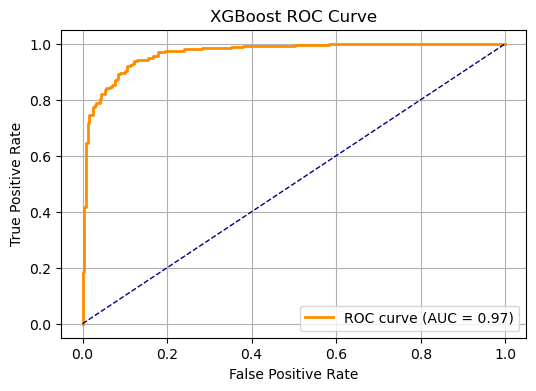

In [74]:
# Compute ROC values
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### After Resampling the data and with XG-Boost Classifier we got 90% Accuracy and the recall value is 92% which is predicting the Attrition accurately.

### CONCLUSION

- Employees aged 27 – 40 are more likely to leave.

- Long commute distances are strongly linked to attrition.

- Those with lower education levels tend to resign more.

- The Sales department and roles like Sales Executive and Lab Technician face the highest attrition.

- Low job satisfaction, poor work-life balance, and low relationship satisfaction are key drivers.

- Overtime work and frequent travel increase attrition risk.

- Single employees leave more than married ones.

- The most influential factor overall: distance from home.